In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
n = 9
arboles = f'../labs/arboles_1000_head.csv'
regresion = f'../runs/run_{n}/regression_{n}_head.csv'
normal = f'../runs/run_{n}/normalizaded_{n}_head.csv'
result = f'../runs/run_{n}/calculo_bio_car_{n}_head.csv'
#/home/gomosak/conafor/SEByc/runs/run_15/regression_15_head.csv /home/gomosak/conafor/SEByc/runs/run_15/calculo_bio_car_15_head.csv

In [4]:
#arboles = '../regression__head.csv'
df = pd.read_csv(arboles)

In [5]:
df

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
0,209385,2007,26005,3,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,34,NaN,NaN,321.60,10.0,26.446588,-107.546118,13.2,BCO,caracteristica_arbolado,194534,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
1,209386,2005,26008,1,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,1,NaN,NaN,50.00,18.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194542,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
2,209387,2005,26008,1,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,30.00,14.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194543,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
3,209388,2005,26008,1,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,3,NaN,NaN,51.00,24.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194544,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
4,209389,2005,26008,1,Vivo,12141.0,Pinaceae,Pinus,engelmannii,NaN,NaN,4,NaN,NaN,49.00,30.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194545,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190612,399997,2005,42006,2,Vivo,9117.0,Euphorbiaceae,Jatropha,cinerea,NaN,NaN,10,NaN,2.0,9.75,3.2,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87500,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN
190613,399998,2005,42006,2,Vivo,20695.0,Burseraceae,Bursera,microphylla,NaN,NaN,11,NaN,3.0,13.16,3.2,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87501,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN
190614,399999,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,12,NaN,2.0,0.00,2.2,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87502,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN
190615,400000,2005,42006,2,Vivo,11795.0,Anacardiaceae,Cyrtocarpa,edulis,NaN,NaN,13,NaN,2.0,10.20,3.6,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87503,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN


In [13]:
df.loc[75817:100000]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
75817,75818,2005,12638,1,Vivo,1829.0,Oleaceae,Fraxinus,NaN,NaN,NaN,10,NaN,NaN,15.981378,8.90,2.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68956,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75818,75819,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,11,NaN,NaN,17.000000,4.92,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68957,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75819,75820,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,12,NaN,NaN,9.000000,3.60,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68958,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75820,75821,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,13,NaN,NaN,7.800000,4.20,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68959,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75821,75822,2005,12638,1,Vivo,3343.0,Fagaceae,Quercus,NaN,NaN,NaN,14,NaN,NaN,12.100000,4.80,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68960,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,99997,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,12,NaN,NaN,13.400000,5.20,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91726,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99997,99998,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,13,NaN,NaN,8.600000,4.50,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91727,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99998,99999,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,14,NaN,NaN,8.900000,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91728,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99999,100000,2005,14554,2,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,15,NaN,NaN,14.900000,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91729,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN


In [10]:
df.loc[75817:100000]

,Unnamed: 0,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
75817,75817,75818,2005,12638,1,Vivo,1829.0,Oleaceae,Fraxinus,NaN,NaN,NaN,10,NaN,NaN,1407.0,8.90,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68956,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75818,75818,75819,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,11,NaN,NaN,17.0,4.92,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68957,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75819,75819,75820,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,12,NaN,NaN,9.0,3.60,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68958,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75820,75820,75821,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,13,NaN,NaN,7.8,4.20,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68959,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75821,75821,75822,2005,12638,1,Vivo,3343.0,Fagaceae,Quercus,NaN,NaN,NaN,14,NaN,NaN,12.1,4.80,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68960,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,99996,99997,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,12,NaN,NaN,13.4,5.20,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91726,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99997,99997,99998,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,13,NaN,NaN,8.6,4.50,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91727,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99998,99998,99999,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,14,NaN,NaN,8.9,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91728,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99999,99999,100000,2005,14554,2,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,15,NaN,NaN,14.9,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91729,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN


In [14]:
df.loc[(df['diametro'] >= 200), 'diametro']

Series([], Name: diametro, dtype: float64)

In [6]:
resulado = pd.read_csv(result)

In [7]:
resulado

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
0,209385,2007,26005,3,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,34,NaN,NaN,22.432915,10.0,2.0,26.446588,-107.546118,13.2,BCO,caracteristica_arbolado,194534,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(0.4726*[b]),(Exp(-2.754)*[d130]**2.574),0.64693,NaN,NaN,191.043748,90.287275
1,209386,2005,26008,1,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,1,NaN,NaN,50.000000,18.0,0.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194542,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.46,(0.283)*((([d130]**2)*[ht])**0.807),0.65041,NaN,NaN,1610.382098,740.775765
2,209387,2005,26008,1,Muerto,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,30.000000,14.0,0.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194543,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.447,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.56366,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.329867,0.329867,0.147451
3,209388,2005,26008,1,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,3,NaN,NaN,51.000000,24.0,0.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194544,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.46,(0.283)*((([d130]**2)*[ht])**0.807),0.65041,NaN,NaN,2097.177414,964.701610
4,209389,2005,26008,1,Vivo,12141.0,Pinaceae,Pinus,engelmannii,NaN,NaN,4,NaN,NaN,49.000000,30.0,0.0,26.453921,-107.394921,13.2,BCO,caracteristica_arbolado,194545,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,152.0,[b]*0.49,(0.1354)*([d130]**2.3033),0.44181,NaN,NaN,1058.393820,518.612972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190612,399997,2005,42006,2,Vivo,9117.0,Euphorbiaceae,Jatropha,cinerea,NaN,NaN,10,NaN,2.0,9.750000,3.2,0.0,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87500,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.30697,NaN,NaN,7.160637,3.200805
190613,399998,2005,42006,2,Vivo,20695.0,Burseraceae,Bursera,microphylla,NaN,NaN,11,NaN,3.0,13.160000,3.2,0.0,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87501,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.44,(0.0841)*([d130]**2.41),0.35798,NaN,NaN,41.898907,18.435519
190614,399999,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,12,NaN,2.0,14.918069,2.2,2.0,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87502,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,17.316123,7.740307
190615,400000,2005,42006,2,Vivo,11795.0,Anacardiaceae,Cyrtocarpa,edulis,NaN,NaN,13,NaN,2.0,10.200000,3.6,0.0,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87503,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.4501,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50074,NaN,NaN,13.563489,6.104926


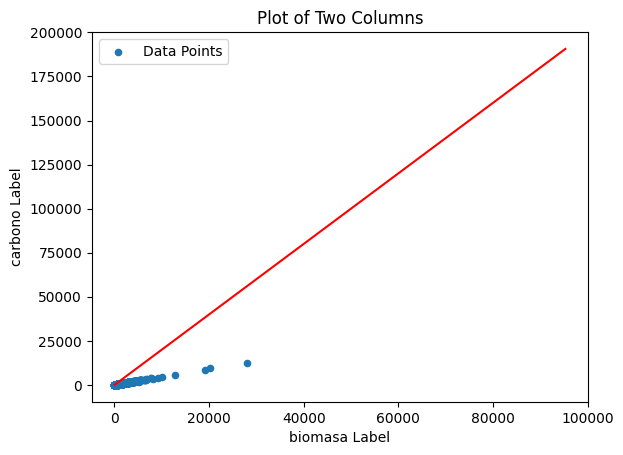

In [8]:
x = resulado.plot(kind='scatter', x='biomasa', y='carbono', label='Data Points')

# Now, use matplotlib's plot and axhline directly
# Plot the line x = y
plt.plot([x / 2 for x in range(len(df))],range(len(df)), color='red', label='x = y')

# Plot the line x = y
#ax.plot(range(1000),range(1000), color='red', label='x = y')
# Add labels and title
plt.xlabel('biomasa Label')
plt.ylabel('carbono Label')
plt.title('Plot of Two Columns')
plt.show()

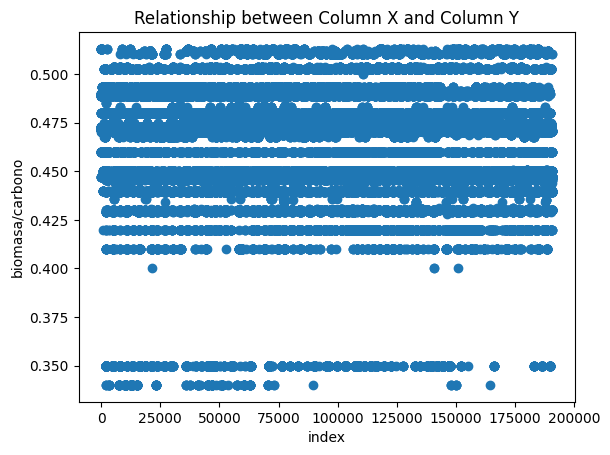

In [9]:
plt.scatter(range(len(resulado)),resulado['carbono']/resulado['biomasa'])

# Add labels and title
plt.xlabel('index')
plt.ylabel('biomasa/carbono')
plt.title('Relationship between Column X and Column Y')

# Show the plot
plt.show()

In [10]:
r4000 = resulado[resulado.biomasa > 4000]

In [11]:
resulado[resulado.is_predicted != 0]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
0,209385,2007,26005,3,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,34,NaN,NaN,22.432915,10.0,2.0,26.446588,-107.546118,13.2,BCO,caracteristica_arbolado,194534,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(0.4726*[b]),(Exp(-2.754)*[d130]**2.574),0.64693,NaN,NaN,191.043748,90.287275
81,209466,2005,26009,3,Vivo,18859.0,Pinaceae,Pinus,lumholtzii,NaN,NaN,2,NaN,NaN,10.769580,5.0,2.0,26.455172,-107.344170,13.2,BCO,caracteristica_arbolado,194622,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.48,(Exp(-3.139)*[d130]**2.585),0.50642,NaN,NaN,20.182892,9.687788
184,209569,2005,26010,2,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,22,NaN,NaN,13.148081,4.5,2.0,26.457644,-107.294280,13.2,BCO,caracteristica_arbolado,194725,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.46,(0.283)*((([d130]**2)*[ht])**0.807),0.65041,NaN,NaN,60.921813,28.024034
208,209593,2005,26010,3,Vivo,33449.0,Ericaceae,Arbutus,xalapensis,NaN,NaN,12,NaN,NaN,11.432928,4.0,2.0,26.456977,-107.294085,13.2,BCO,caracteristica_arbolado,194749,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4715,(Exp(-0.877)*[d130]**1.98),0.55594,NaN,NaN,51.793529,24.420649
378,209763,2005,26014,1,Vivo,33449.0,Ericaceae,Arbutus,xalapensis,NaN,NaN,4,NaN,NaN,10.555122,3.6,2.0,26.463450,-107.091887,13.2,BCO,caracteristica_arbolado,194919,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4715,(Exp(-0.877)*[d130]**1.98),0.55594,NaN,NaN,44.216158,20.847918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190599,399984,2005,42006,1,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,9,NaN,2.0,14.418322,1.8,2.0,23.187391,-109.523034,14.6,MXL,caracteristica_vegetacion_mayor,89425,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,13.536654,6.050884
190606,399991,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,4,NaN,1.0,14.168448,1.6,2.0,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87051,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,11.769182,5.260824
190608,399993,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,6,NaN,2.0,14.418322,1.8,2.0,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87053,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,13.536654,6.050884
190614,399999,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,12,NaN,2.0,14.918069,2.2,2.0,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87502,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,17.316123,7.740307


In [ ]:
(0.283)*((([d130]**2)*[ht])**0.807)

In [13]:
resulado[resulado.biomasa > 3000]


,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
25,209410,2005,26008,3,Vivo,29120.0,Fagaceae,Quercus,sideroxyla,NaN,NaN,3,NaN,NaN,62.0,21.0,0.0,26.453560,-107.394643,13.2,BCO,caracteristica_arbolado,194566,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(0.4726*[b]),(Exp(-2.592)*[d130]**2.585),0.61387,NaN,NaN,3218.408898,1521.020045
30,209415,2005,26008,4,Vivo,12141.0,Pinaceae,Pinus,engelmannii,NaN,NaN,3,NaN,NaN,63.0,40.0,0.0,26.453783,-107.395365,13.2,BCO,caracteristica_arbolado,194571,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.49,(0.058)*((([d130]**2)*[ht])**0.919),0.44181,NaN,NaN,3490.672105,1710.429332
31,209416,2005,26008,4,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,4,NaN,NaN,67.0,24.0,0.0,26.453783,-107.395365,13.2,BCO,caracteristica_arbolado,194572,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.46,(0.283)*((([d130]**2)*[ht])**0.807),0.65041,NaN,NaN,3257.629125,1498.509397
42,209427,2005,26009,1,Vivo,11688.0,Pinaceae,Pinus,durangensis,NaN,NaN,8,NaN,NaN,71.0,34.0,0.0,26.455560,-107.344670,13.2,BCO,caracteristica_arbolado,194592,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4896,(0.058)*((([d130]**2)*[ht])**0.919),0.42956,NaN,NaN,3745.156438,1833.628592
306,209691,2005,26011,1,Vivo,11688.0,Pinaceae,Pinus,durangensis,NaN,NaN,3,NaN,NaN,69.0,32.0,0.0,26.458922,-107.244112,13.2,BCO,caracteristica_arbolado,194854,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4896,(0.058)*((([d130]**2)*[ht])**0.919),0.42956,NaN,NaN,3360.976318,1645.534005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176170,385555,2005,41180,3,Vivo,8512.0,Pinaceae,Pinus,cembroides,NaN,NaN,3,NaN,NaN,43.2,87.0,0.0,23.579817,-99.693802,13.3,BE,caracteristica_arbolado,355073,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.3.1,13.3.1.1,28,Tamaulipas,45.0,(0.5025*[b]),(0.058)*((([d130]**2)*[ht])**0.919),0.51314,NaN,NaN,3563.406053,1790.611542
181645,391030,2005,41455,4,Vivo,11716.0,Fagaceae,Quercus,durifolia,NaN,NaN,49,NaN,NaN,88.2,16.6,0.0,23.469752,-105.353645,13.2,BCO,caracteristica_arbolado,359940,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,78.0,[b]*0.45,(0.283)*((([d130]**2)*[ht])**0.807),0.64296,NaN,NaN,3770.508802,1696.728961
182266,391651,2005,41465,1,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,15,NaN,NaN,75.7,22.8,0.0,23.479614,-104.861329,13.2,BCO,caracteristica_arbolado,360609,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,[b]*0.46,(0.283)*((([d130]**2)*[ht])**0.807),0.65041,NaN,NaN,3806.278892,1750.888290
182420,391805,2005,41465,4,Vivo,29120.0,Fagaceae,Quercus,sideroxyla,NaN,NaN,14,NaN,NaN,75.9,24.4,0.0,23.479475,-104.861773,13.2,BCO,caracteristica_arbolado,360761,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,(0.4726*[b]),(0.283)*((([d130]**2)*[ht])**0.807),0.61387,NaN,NaN,4037.571737,1908.156403


In [16]:
row = resulado[resulado["id"] == 315261]
row

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
105876,315261,2005,35763,1,Vivo,3736.0,Cactaceae,Stenocereus,NaN,NaN,NaN,1,NaN,0.0,124.612696,90.0,2.0,24.46816,-111.086405,10.2,MXL,caracteristica_vegetacion_mayor,95586,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,10,10.2.3,10.2.3.3,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55779,NaN,NaN,27997.639109,12514.944682


In [16]:
r4000 = resulado[resulado.is_predicted != 0]

In [20]:
index = r4000.index

In [23]:
df.loc[index].diametro

0         321.6
81          7.5
184         7.5
208         7.5
378         7.5
          ...  
190599      0.0
190606      0.0
190608      0.0
190614      0.0
190616      0.0
Name: diametro, Length: 6909, dtype: float64

In [25]:
r4000.insert(17, "diametro_original", df.loc[index].diametro)

In [27]:
r4000.insert(18, "altura_original", df.loc[index].altura)


In [28]:
r4000

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,diametro_original,altura_original,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
0,209385,2007,26005,3,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,34,NaN,NaN,22.432915,10.0,2.0,321.6,10.0,26.446588,-107.546118,13.2,BCO,caracteristica_arbolado,194534,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,(0.4726*[b]),(Exp(-2.754)*[d130]**2.574),0.64693,NaN,NaN,191.043748,90.287275
81,209466,2005,26009,3,Vivo,18859.0,Pinaceae,Pinus,lumholtzii,NaN,NaN,2,NaN,NaN,10.769580,5.0,2.0,7.5,5.0,26.455172,-107.344170,13.2,BCO,caracteristica_arbolado,194622,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.48,(Exp(-3.139)*[d130]**2.585),0.50642,NaN,NaN,20.182892,9.687788
184,209569,2005,26010,2,Vivo,27679.0,Fagaceae,Quercus,rugosa,NaN,NaN,22,NaN,NaN,13.148081,4.5,2.0,7.5,4.5,26.457644,-107.294280,13.2,BCO,caracteristica_arbolado,194725,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.46,(0.283)*((([d130]**2)*[ht])**0.807),0.65041,NaN,NaN,60.921813,28.024034
208,209593,2005,26010,3,Vivo,33449.0,Ericaceae,Arbutus,xalapensis,NaN,NaN,12,NaN,NaN,11.432928,4.0,2.0,7.5,4.0,26.456977,-107.294085,13.2,BCO,caracteristica_arbolado,194749,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4715,(Exp(-0.877)*[d130]**1.98),0.55594,NaN,NaN,51.793529,24.420649
378,209763,2005,26014,1,Vivo,33449.0,Ericaceae,Arbutus,xalapensis,NaN,NaN,4,NaN,NaN,10.555122,3.6,2.0,7.5,3.6,26.463450,-107.091887,13.2,BCO,caracteristica_arbolado,194919,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4715,(Exp(-0.877)*[d130]**1.98),0.55594,NaN,NaN,44.216158,20.847918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190599,399984,2005,42006,1,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,9,NaN,2.0,14.418322,1.8,2.0,0.0,1.8,23.187391,-109.523034,14.6,MXL,caracteristica_vegetacion_mayor,89425,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,13.536654,6.050884
190606,399991,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,4,NaN,1.0,14.168448,1.6,2.0,0.0,1.6,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87051,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,11.769182,5.260824
190608,399993,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,6,NaN,2.0,14.418322,1.8,2.0,0.0,1.8,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87053,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,13.536654,6.050884
190614,399999,2005,42006,2,Vivo,14976.0,Cactaceae,Stenocereus,gummosus,NaN,NaN,12,NaN,2.0,14.918069,2.2,2.0,0.0,2.2,23.187752,-109.523006,14.6,MXL,caracteristica_vegetacion_mayor,87502,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.6.1,14.6.1.1,3,Baja California Sur,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.50012,NaN,NaN,17.316123,7.740307


In [15]:
r4000.to_csv("biomasa_mayor_3t.csv",index=False)


In [ ]:
resulado[resulado.biomasa > 3000]

In [27]:
(math.exp(-2.187+(0.916*(math.log((.5577)*((124.6)**2)*(90),2)))))

6856509.60611261

In [23]:
math.log??


Docstring:
log(x, [base=math.e])
Return the logarithm of x to the given base.

If the base is not specified, returns the natural logarithm (base e) of x.
Type:      builtin_function_or_method

In [25]:
math.ln??

Object `math.ln` not found.


In [12]:
resulado[(resulado["diametro"]>50) & (resulado["altura"]<15)]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
329,209714,2005,26011,2,Vivo,33449.0,Ericaceae,Arbutus,xalapensis,NaN,NaN,7,NaN,NaN,52.0,11.0,0.0,26.459283,-107.244001,13.2,BCO,caracteristica_arbolado,194870,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4715,(Exp(-1.922)*[d130]**2.321),0.55594,NaN,NaN,1406.467711,663.149526
787,210172,2006,26023,2,Vivo,33449.0,Ericaceae,Arbutus,xalapensis,NaN,NaN,1,NaN,NaN,52.7,7.8,0.0,26.478145,-106.640155,13.2,BCO,caracteristica_arbolado,195328,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.4715,(Exp(-1.922)*[d130]**2.321),0.55594,NaN,NaN,1450.802996,684.053613
1266,210651,2005,26032,1,Vivo,10171.0,Fagaceae,Quercus,crassifolia,NaN,NaN,17,NaN,NaN,52.0,10.3,0.0,26.493007,-106.185729,13.2,BCO,caracteristica_arbolado,195807,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,(0.4726*[b]),(0.283)*((([d130]**2)*[ht])**0.807),0.63181,NaN,NaN,1093.390944,516.736560
1440,210825,2005,26034,1,Vivo,14706.0,Fagaceae,Quercus,grisea,NaN,NaN,12,NaN,NaN,52.5,10.5,0.0,26.493091,-106.086588,13.2,BE,caracteristica_arbolado,195981,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,(0.4726*[b]),(0.45534)*([d130]**2),0.68527,NaN,NaN,1255.030875,593.127592
2433,211818,2006,26224,4,Vivo,8036.0,Fagaceae,Quercus,candicans,NaN,NaN,1,NaN,NaN,61.5,11.5,0.0,26.400895,-107.640954,13.2,BCO,caracteristica_arbolado,196930,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN,[b]*0.45,(0.283)*((([d130]**2)*[ht])**0.807),0.61083,NaN,NaN,1566.801684,705.060758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188065,397450,2005,41828,3,Vivo,6083.0,Burseraceae,Trattinnickia,aspera,NaN,NaN,25,NaN,NaN,57.7,9.0,0.0,23.365700,-105.891572,14.3,BE,caracteristica_arbolado,365878,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,14,14.3.2,14.3.2.1,25,Sinaloa,NaN,[b]*0.4354,(1.7737)*([d130]**1.2282),0.42394,NaN,NaN,258.200037,112.420296
188507,397892,2005,41846,3,Vivo,11716.0,Fagaceae,Quercus,durifolia,NaN,NaN,2,NaN,NaN,51.1,14.1,0.0,23.385729,-105.006443,13.2,BCO,caracteristica_arbolado,366320,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,[b]*0.45,(0.45534)*([d130]**2),0.64296,NaN,NaN,1188.988361,535.044763
188990,398375,2005,41852,4,Muerto,12932.0,Cupressaceae,Juniperus,flaccida,NaN,NaN,18,NaN,NaN,50.1,5.7,0.0,23.391286,-104.712103,13.2,BCO,caracteristica_arbolado,366803,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,(0.5118*[b]),(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.47912,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.374558,0.374558,0.191699
189040,398425,2005,41853,4,Muerto,11020.0,Cupressaceae,Juniperus,deppeana,NaN,NaN,2,NaN,NaN,50.3,7.8,0.0,23.392397,-104.663213,13.2,BCO,caracteristica_arbolado,366853,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,[b]*0.48,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.44390,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.516653,0.516653,0.247993


In [ ]:
resulado[(resulado["diametro"]>50) & (resulado["altura"]<15)]
